**Problem.** Znajdź największe koło wpisane w wielokąt o zadanych współrzędnych, np. (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0).

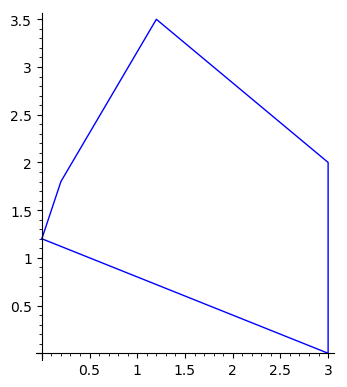

In [21]:
W = [ (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0) ]
W.append(W[0])
list_plot(W, plotjoined=True, aspect_ratio=1.0)

In [1]:
# Maksymalne koło wpisane

# Dane problemu

W = [ (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0) ]
W.append(W[0])
list_plot(W, plotjoined=True, aspect_ratio=1.0)
W.pop()

# Rozwiązanie problemu

p = InteractiveLPProblem(matrix(0, 3, []), vector([]), (0,0,1), ["x", "y", "r"], base_ring=RR) # tworzymy pusty problem; ze względów formalnych musimy podać jakiś warunek - pusty

# ćwiczenie: sprawdź, co wychodzi nad domyślnym pierścieniem QQ

def add_halfplane_constraint(A, B, P):
    dx = A[0] - B[0]
    dy = A[1] - B[1]
    c = dy * A[0] - dx * A[1]

    if -dy * P[0] + dx * P[1] + c < 0:
        dx, dy, c = -dx, -dy, -c

    global p
    p = p.add_constraint(([-dy / sqrt(dy*dy+dx*dx), dx / sqrt(dy*dy+dx*dx), -1]), -c/sqrt(dy*dy+dx*dx), ">=")

for i in range(len(W) - 2):
    add_halfplane_constraint(W[i], W[i+1], W[i+2])

add_halfplane_constraint(W[-2], W[-1], W[0])
add_halfplane_constraint(W[-1], W[0], W[1])

show(p)


LP problem (use typeset mode to see details)

Optymalna wartosc funkcji celu =  1.11492147900000
x= 1.495131457  y= 1.802754599  r= 1.114921479


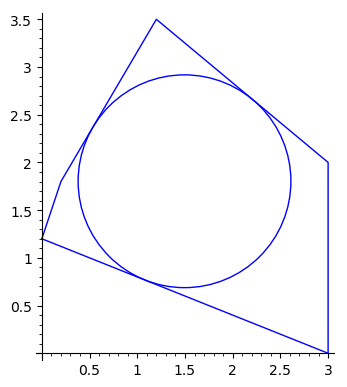

In [2]:

# Rozwiązanie problemu

p = p.standard_form()
#show(p)

sol = p.optimal_solution()

x = sol[0]-sol[1]
y = sol[2]-sol[3]
r = sol[4]
W = [ (0.0, 1.2), (0.2, 1.8), (1.2, 3.5), (3.0, 2.0), (3.0, 0.0) ]

print 'Optymalna wartosc funkcji celu = ', p.optimal_value()
print 'x=', x, ' y=', y, ' r=', r

# Wizualizacja

W.append(W[0])
circle((x, y), r) + list_plot(W, plotjoined=True)